# **Decision Tree**

In [1]:
!pip install openpyxl
!pip install statsmodels

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV

from sklearn.tree import plot_tree

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_excel('/work/Data Modelos.xlsx')
df.columns

Index(['Suscriptores ganados', 'Tiempo de visualizaci√≥n (horas)', 'Me gusta',
       'Clics en teaser de tarjeta', 'Tarjetas mostradas',
       'Clics en elementos de pantalla final', 'suscriptores',
       'Densidad_Publicitaria', 'Porcentaje de clics de las impresiones (%)',
       'Duracion Minutos', 'Comentarios a√±adidos',
       'Porcentaje medio visto (%)', 'rating', 'dia_semana',
       'consecutivo_tema', 'No me gusta', 'RPM (USD)', 'marca_exito'],
      dtype='object')

0    0.55
1    0.45
Name: marca_exito, dtype: float64


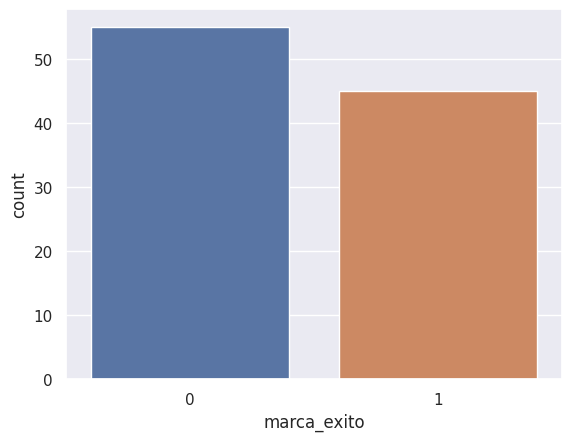

In [3]:
print( df.marca_exito.value_counts() / df.marca_exito.value_counts().sum() )
sns.countplot(x= 'marca_exito', data = df);

In [4]:
# diviendo los datos de testeo y entrenamiento:

X = df.drop(['marca_exito', 'Porcentaje de clics de las impresiones (%)', 'RPM (USD)',  'id'], axis= 1)
names = X.columns

scaler = StandardScaler()
X = np.array(X)
X = StandardScaler().fit_transform(X)

y = df.marca_exito
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(70, 15)
(30, 15)


Testing accuracy train = 1.0
Testing accuracy  test= 0.6666666666666666
[0.78571429 0.42857143 0.71428571 0.92857143 0.57142857]
Mediana 0.7143
Media 0.6857
Min 0.4286
Max 0.9286
-------------------------------------------------------------------------------------------------------------
Best estimador: {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 23, 'criterion': 'entropy'}
Testing accuracy train = 0.8571428571428571
Testing accuracy  test= 0.7666666666666667
-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.60      0.67      0.63         9

    accuracy                           0.77        30
   macro avg       0.72      0.74      0.73        30
weighted avg       0.77      0.77      0.77        30



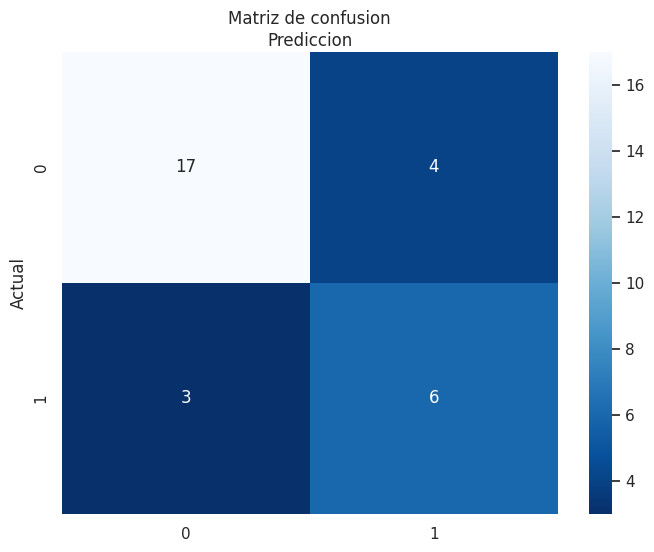

In [5]:
random_grid = { 'max_depth':[int(i) for i in range(1,25)],
"criterion" : ["gini", "entropy", "log_loss"],
"min_samples_split": [int(i) for i in range(1,10)],
"min_samples_leaf":  [int(i) for i in range(1,10)]
}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

tree = DecisionTreeClassifier(random_state=42) 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

scores = cross_val_score(tree, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")


tree = DecisionTreeClassifier(random_state=42) 

tree = RandomizedSearchCV(estimator = tree, param_distributions = random_grid,random_state=42, cv=cv)
tree.fit(X_train, y_train)
print('Best estimador:', tree.best_params_)

y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

cnf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g',)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediccion')
ax.set_ylabel('Actual')
ax.set_title('Matriz de confusion')

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [6]:
importancia =  tree.best_estimator_.feature_importances_
impvariables=pd.DataFrame()
impvariables['Variable']= names
impvariables['Importancia'] = importancia
impvariables.sort_values('Importancia', ascending=False)

,Variable,Importancia
1,Tiempo de visualizaci√≥n (horas),0.476340
10,Porcentaje medio visto (%),0.243423
6,suscriptores,0.154610
8,Duracion Minutos,0.125628
0,Suscriptores ganados,0.000000
2,Me gusta,0.000000
3,Clics en teaser de tarjeta,0.000000
4,Tarjetas mostradas,0.000000
5,Clics en elementos de pantalla final,0.000000
7,Densidad_Publicitaria,0.000000


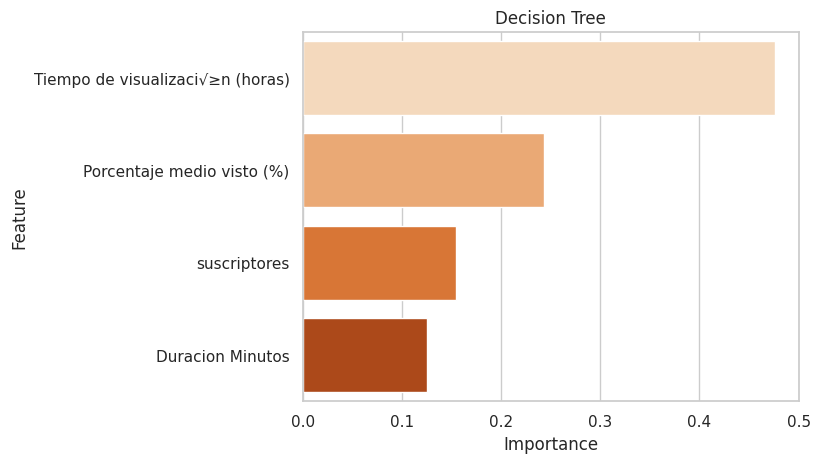

In [7]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0]
impvariables.sort_values('Importancia', ascending = False, inplace=True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Decision Tree');

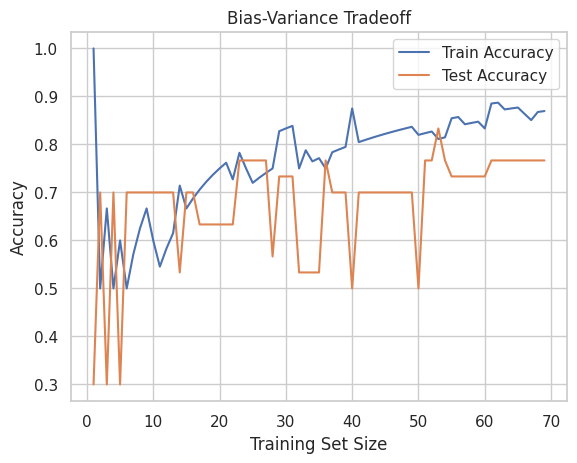

In [8]:
# Inicializa las listas para almacenar las precisiones
train_accuracies = []
test_accuracies = []

# Define el rango de tamaños de conjunto de entrenamiento
train_sizes = np.arange(1, len(X_train))

# Calcula la precisión para diferentes tamaños de conjunto de entrenamiento
for train_size in train_sizes:
    # Ajusta el modelo de árbol de decisión
    model = DecisionTreeClassifier(min_samples_split= 8, min_samples_leaf= 7, max_depth= 6, criterion= 'gini')
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calcula la precisión del conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train[:train_size])
    train_accuracy = accuracy_score(y_train[:train_size], train_pred)
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Almacena las precisiones del conjunto de entrenamiento y prueba
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Grafica las precisiones en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>